Примените 1 метод proximity-based, 1 метод prediction-based и 1 метод reconstruction-based, из описанных в лекциях. Модели не упомянутые на слайдах использовать запрещается

Посчитайте f1, precision и recall для каждого из методов

Добавьте оценку качества моделей детекции аномалий не используя реальные значения таргета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ANOMALY_FREE_DATA = '/content/drive/MyDrive/временные ряды/anomaly-free.csv'
VALVE1 = '/content/drive/MyDrive/временные ряды/valve1/1.csv'
VALVE2 = '/content/drive/MyDrive/временные ряды/valve2/1.csv'
#FULL_DATA = '/content/drive/MyDrive/временные ряды/data_lec.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv(ANOMALY_FREE_DATA, sep=';')
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             9405 non-null   datetime64[ns]
 1   Accelerometer1RMS    9405 non-null   float64       
 2   Accelerometer2RMS    9405 non-null   float64       
 3   Current              9405 non-null   float64       
 4   Pressure             9405 non-null   float64       
 5   Temperature          9405 non-null   float64       
 6   Thermocouple         9405 non-null   float64       
 7   Voltage              9405 non-null   float64       
 8   Volume Flow RateRMS  9405 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 661.4 KB


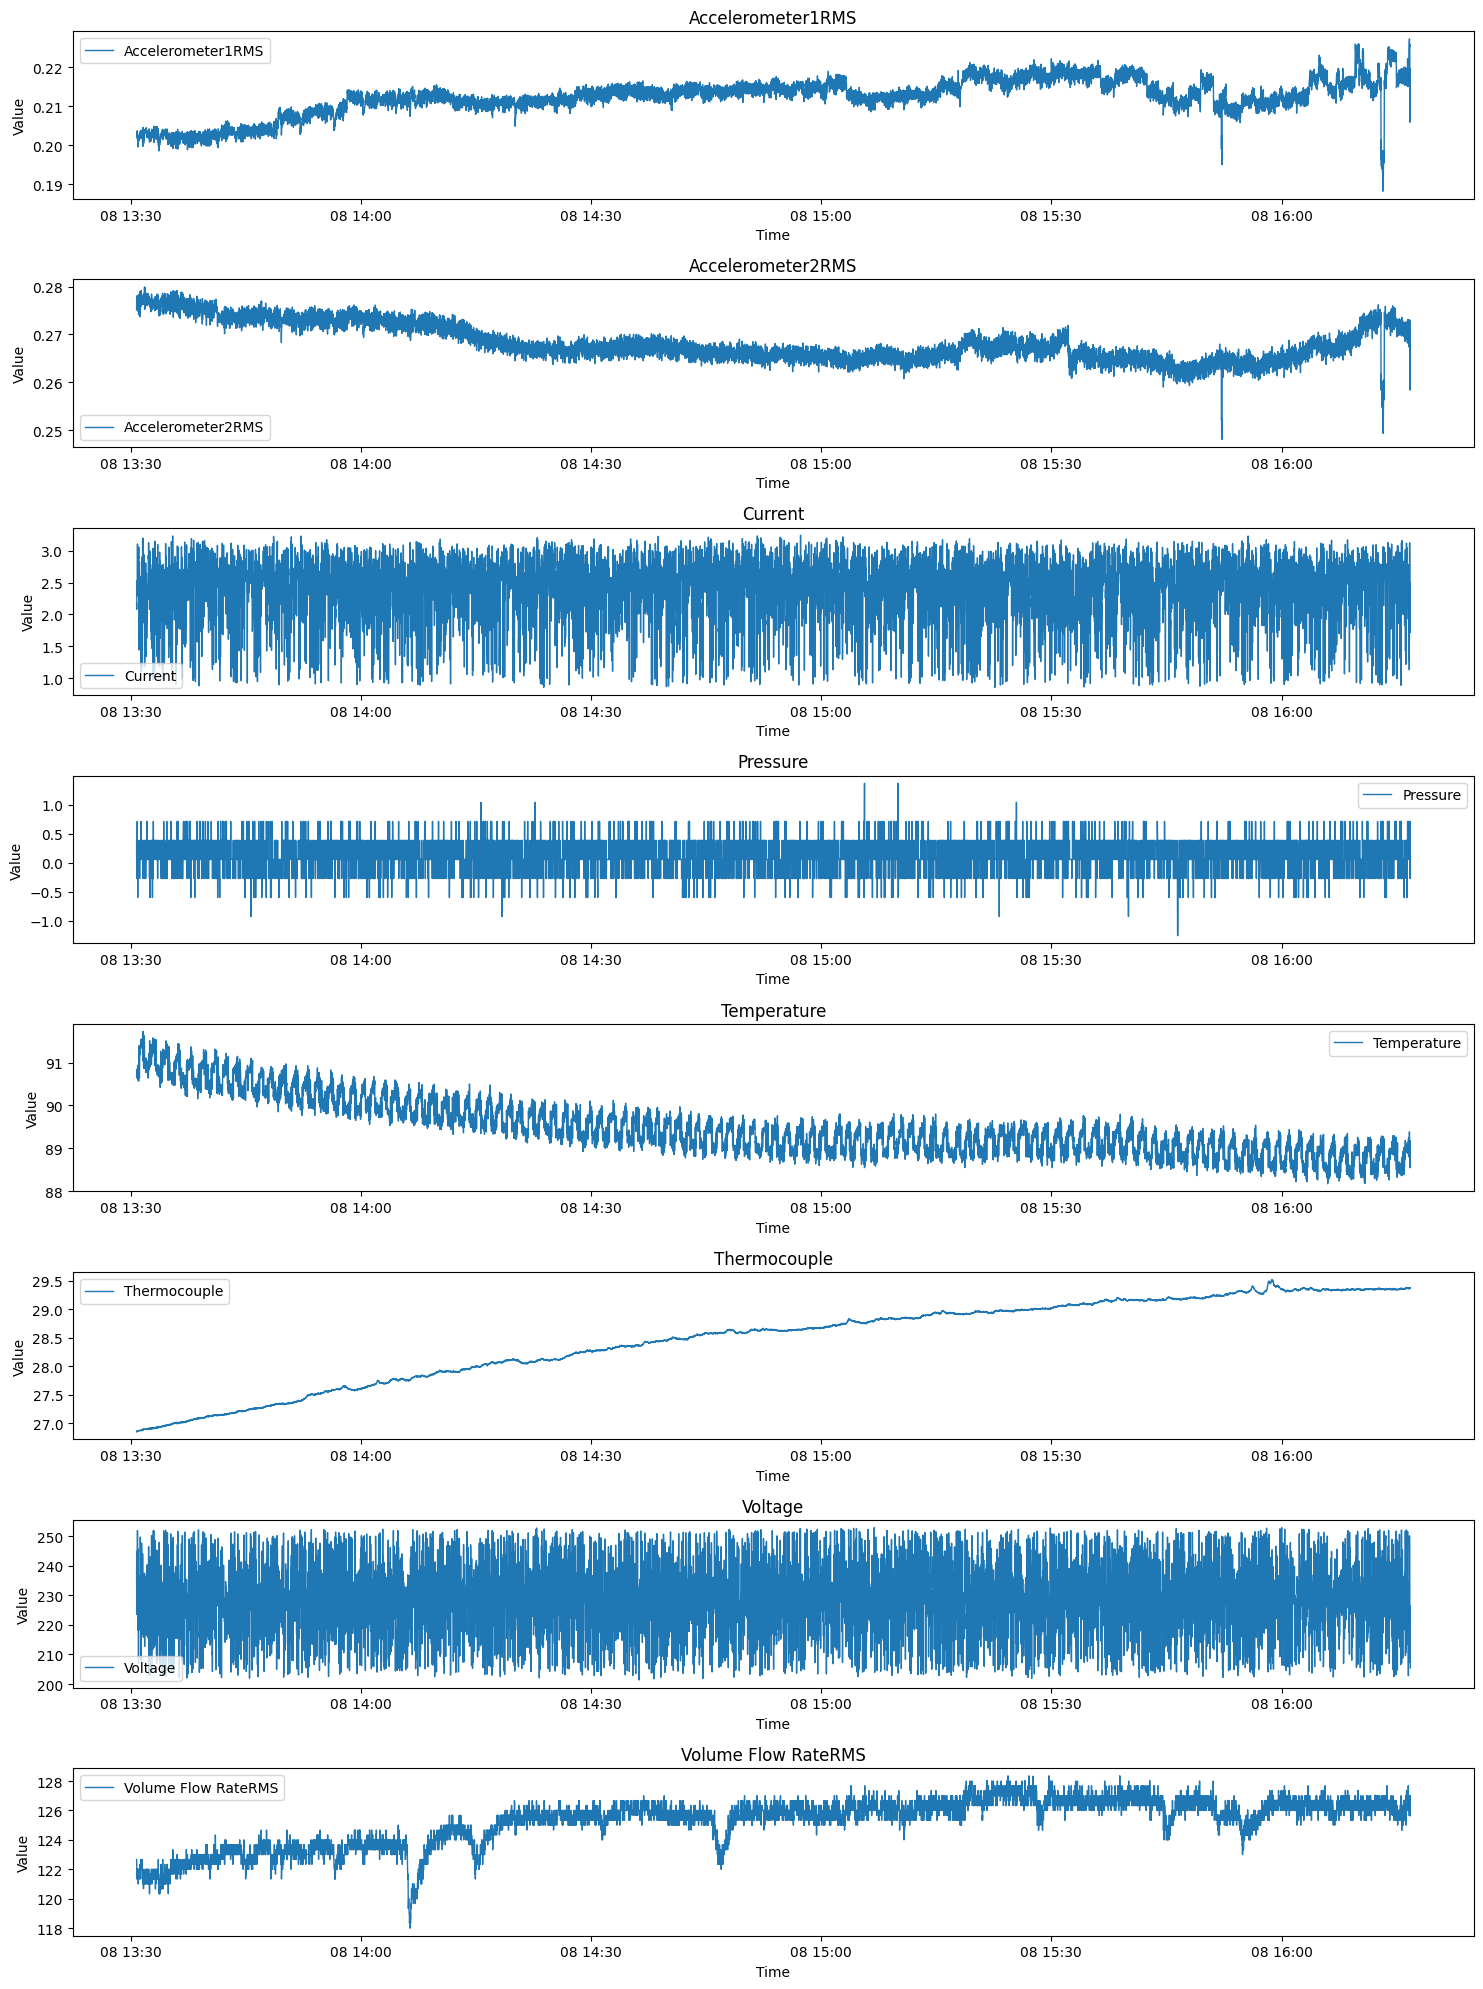

In [ ]:
plt.figure(figsize=(15, 20))

features_to_plot = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(df['datetime'], df[feature], label=feature, linewidth=1)
    plt.title(feature)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1145 non-null   datetime64[ns]
 1   Accelerometer1RMS    1145 non-null   float64       
 2   Accelerometer2RMS    1145 non-null   float64       
 3   Current              1145 non-null   float64       
 4   Pressure             1145 non-null   float64       
 5   Temperature          1145 non-null   float64       
 6   Thermocouple         1145 non-null   float64       
 7   Voltage              1145 non-null   float64       
 8   Volume Flow RateRMS  1145 non-null   float64       
 9   anomaly              1145 non-null   float64       
 10  changepoint          1145 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 98.5 KB


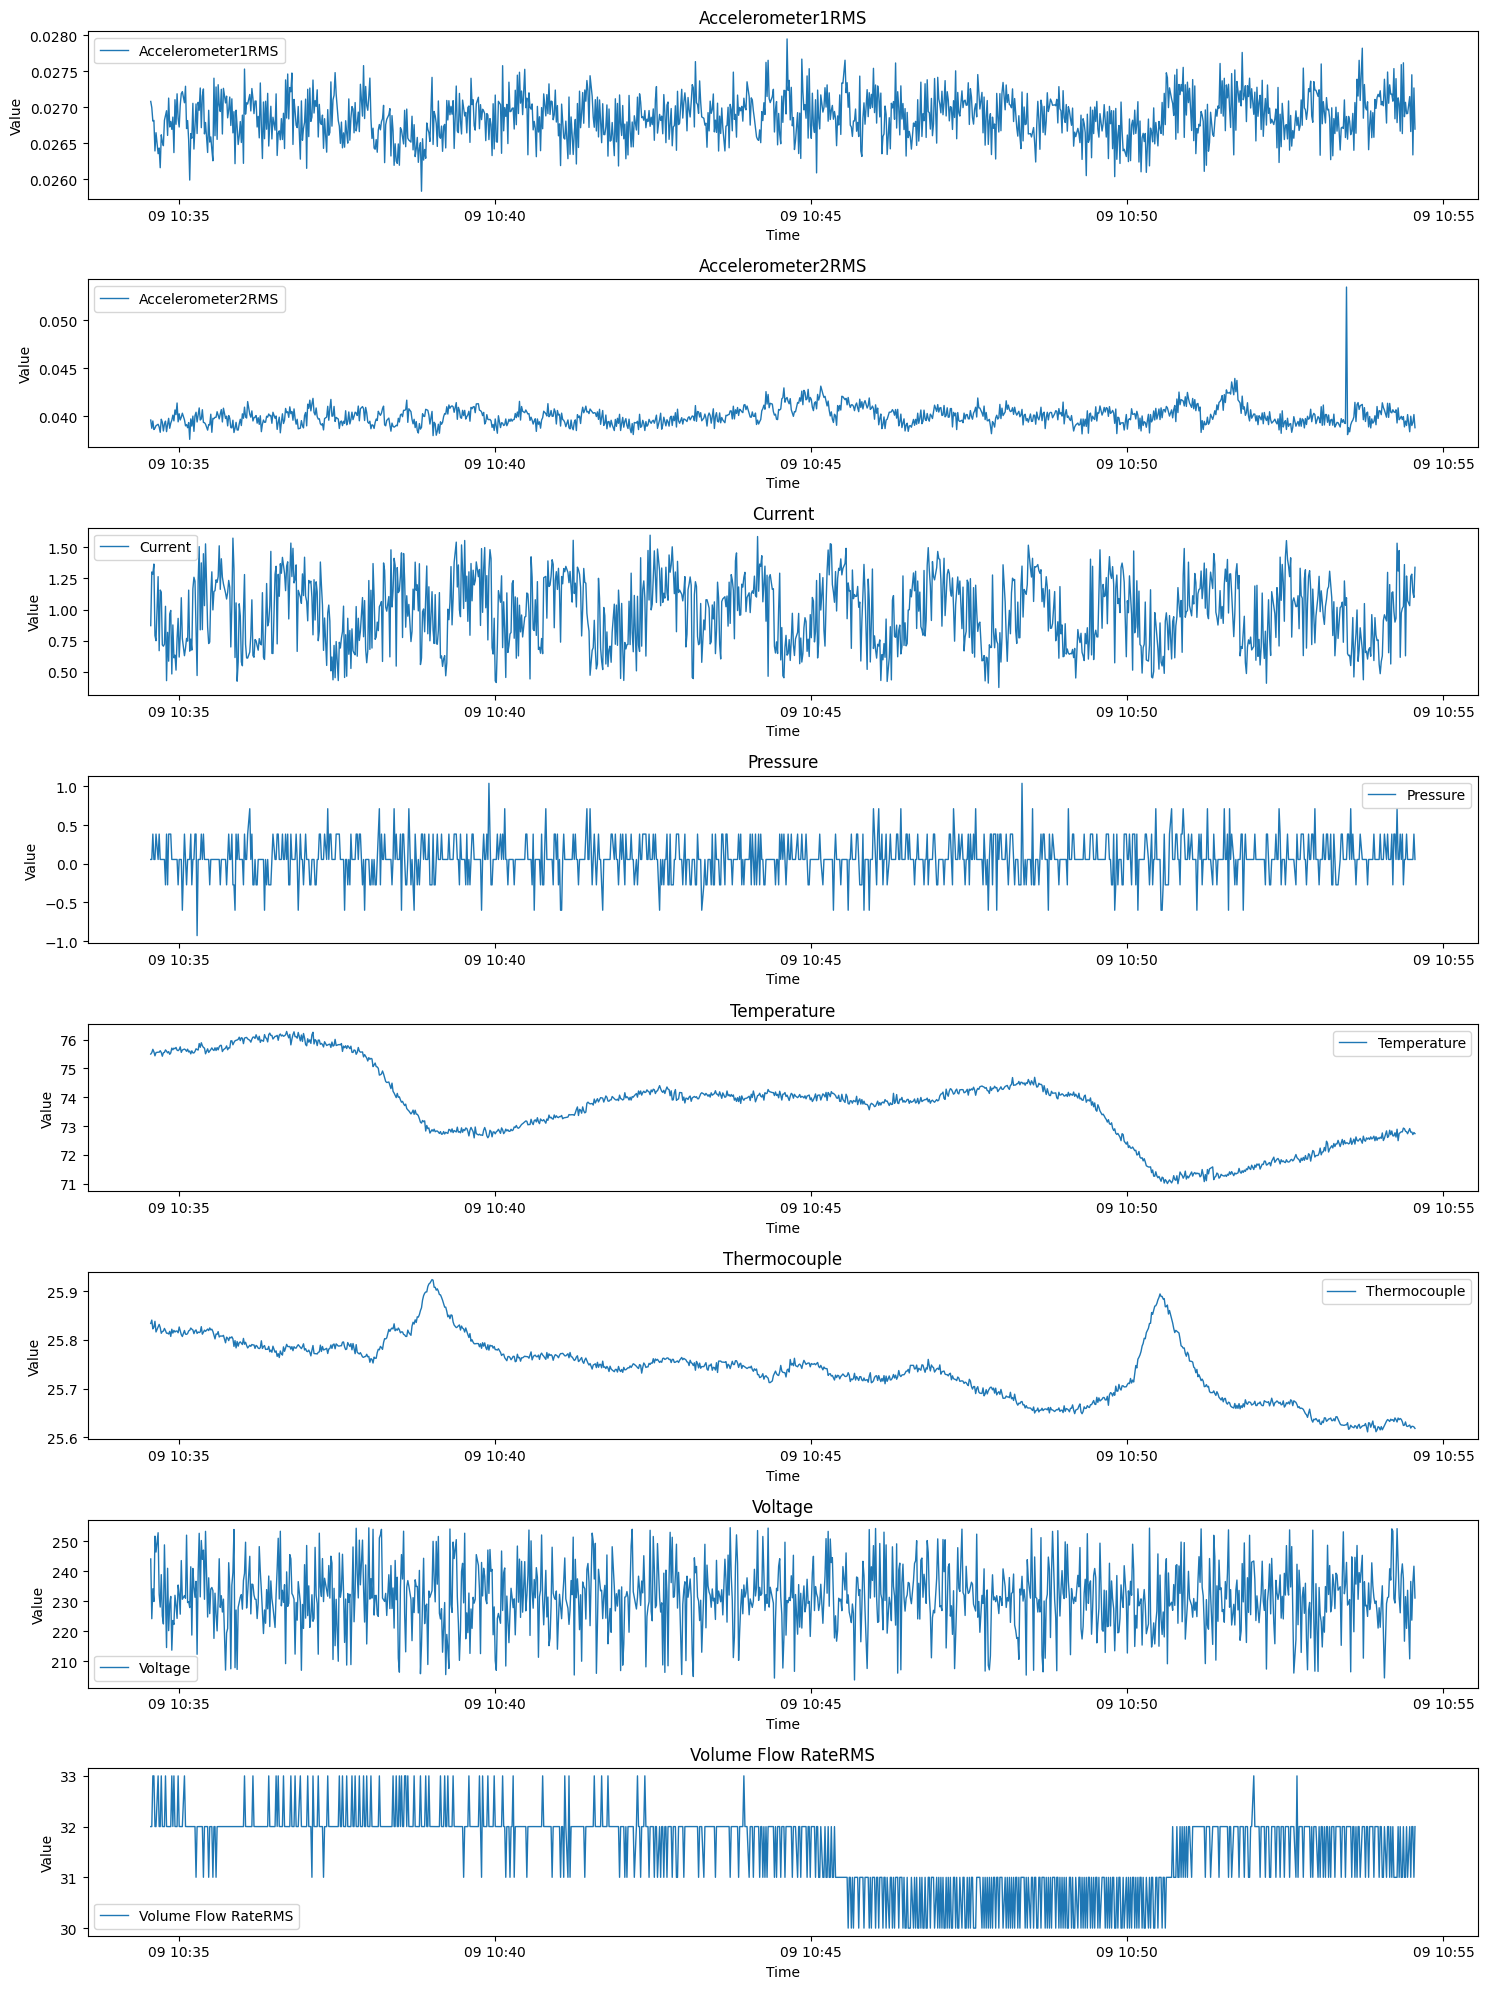

In [ ]:
#данные для теста
valve1_df = pd.read_csv(VALVE1, sep=';')
valve1_df['datetime'] = pd.to_datetime(valve1_df['datetime'])
valve1_df.info()

plt.figure(figsize=(15, 20))

features_to_plot = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(valve1_df['datetime'], valve1_df[feature], label=feature, linewidth=1)
    plt.title(feature)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


# Обучение методом Proximity-based (DBSCAN)


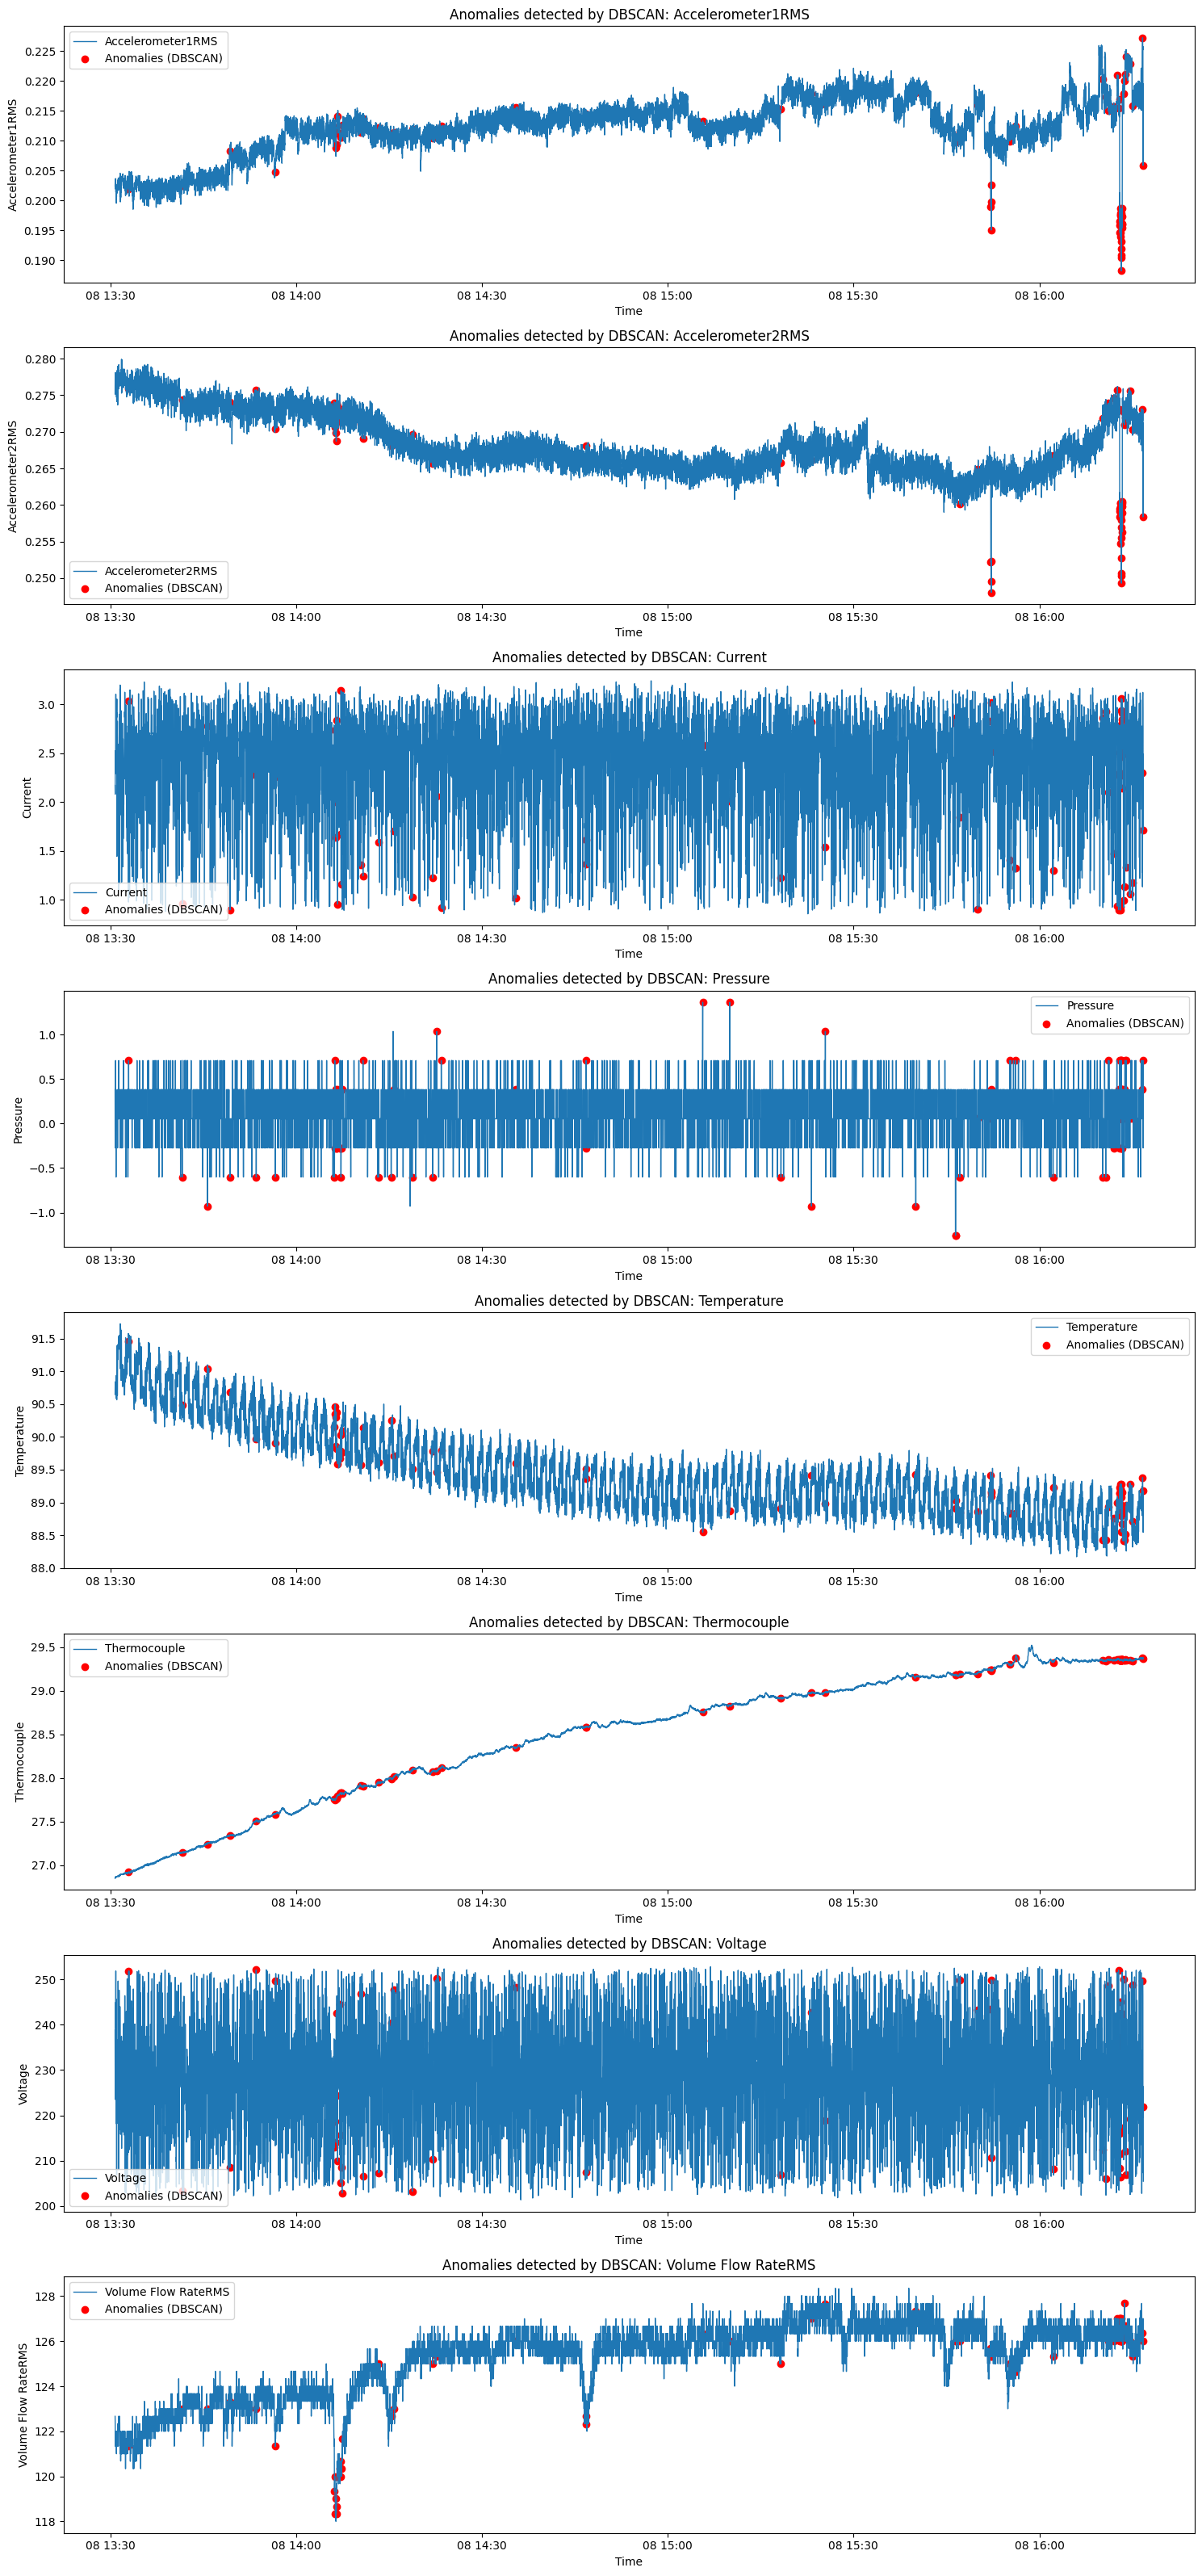

In [ ]:
# from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

numerical_data = df[['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']]
# knn = NearestNeighbors(n_neighbors=5)
# knn.fit(numerical_data)

# distances, _ = knn.kneighbors(numerical_data)
# avg_distances = distances.mean(axis=1)

# threshold = np.percentile(avg_distances, 95)
# anomalies_knn = avg_distances > threshold

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

dbscan = DBSCAN(eps=1.5, min_samples=10)  # eps и min_samples можно настраивать
clusters = dbscan.fit_predict(scaled_data)

anomalies_dbscan = clusters == -1

plt.figure(figsize=(15, len(numerical_data.columns) * 4))

for i, feature in enumerate(numerical_data.columns, 1):
    plt.subplot(len(numerical_data.columns), 1, i)
    plt.plot(df['datetime'], df[feature], label=feature, linewidth=1)
    plt.scatter(
        df['datetime'][anomalies_dbscan],
        df[feature][anomalies_dbscan],
        color='red',
        label='Anomalies (DBSCAN)'
    )
    plt.title(f"Anomalies detected by DBSCAN: {feature}")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


Метод дает более выборочную оценку аномалий, в сравнении с knn с большим количеством ложных срабатываний

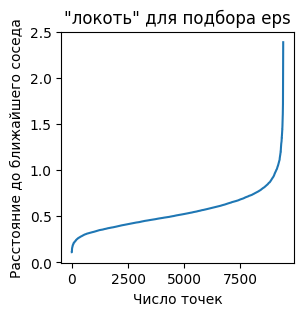

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
avg_distances = distances[:, 1]

# Построение графика "локтя"
plt.figure(figsize=(3, 3))
plt.plot(sorted(avg_distances))
plt.xlabel('Число точек')
plt.ylabel('Расстояние до ближайшего соседа')
plt.title('"локоть" для подбора eps')
plt.show()

В целом eps = 1.5 соответствует графику knn

In [ ]:
valve1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1145 non-null   datetime64[ns]
 1   Accelerometer1RMS    1145 non-null   float64       
 2   Accelerometer2RMS    1145 non-null   float64       
 3   Current              1145 non-null   float64       
 4   Pressure             1145 non-null   float64       
 5   Temperature          1145 non-null   float64       
 6   Thermocouple         1145 non-null   float64       
 7   Voltage              1145 non-null   float64       
 8   Volume Flow RateRMS  1145 non-null   float64       
 9   anomaly              1145 non-null   float64       
 10  changepoint          1145 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 98.5 KB


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Используем уже обученную модель DBSCAN для тестовых данных
train_numerical_columns = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']

scaled_test_data = scaler.transform(valve1_df[train_numerical_columns])

# Применяем DBSCAN на тестовом наборе
dbscan_test = DBSCAN(eps=1.4, min_samples=10)
test_clusters = dbscan_test.fit_predict(scaled_test_data)
test_anomalies = test_clusters == -1  # Аномалии: метка -1

# Сравнение с метками 'anomaly'
true_anomalies = valve1_df['anomaly'] == 1

precision = precision_score(true_anomalies, test_anomalies)
recall = recall_score(true_anomalies, test_anomalies)
f1 = f1_score(true_anomalies, test_anomalies)

precision, recall, f1


(0.43902439024390244, 0.04477611940298507, 0.08126410835214447)

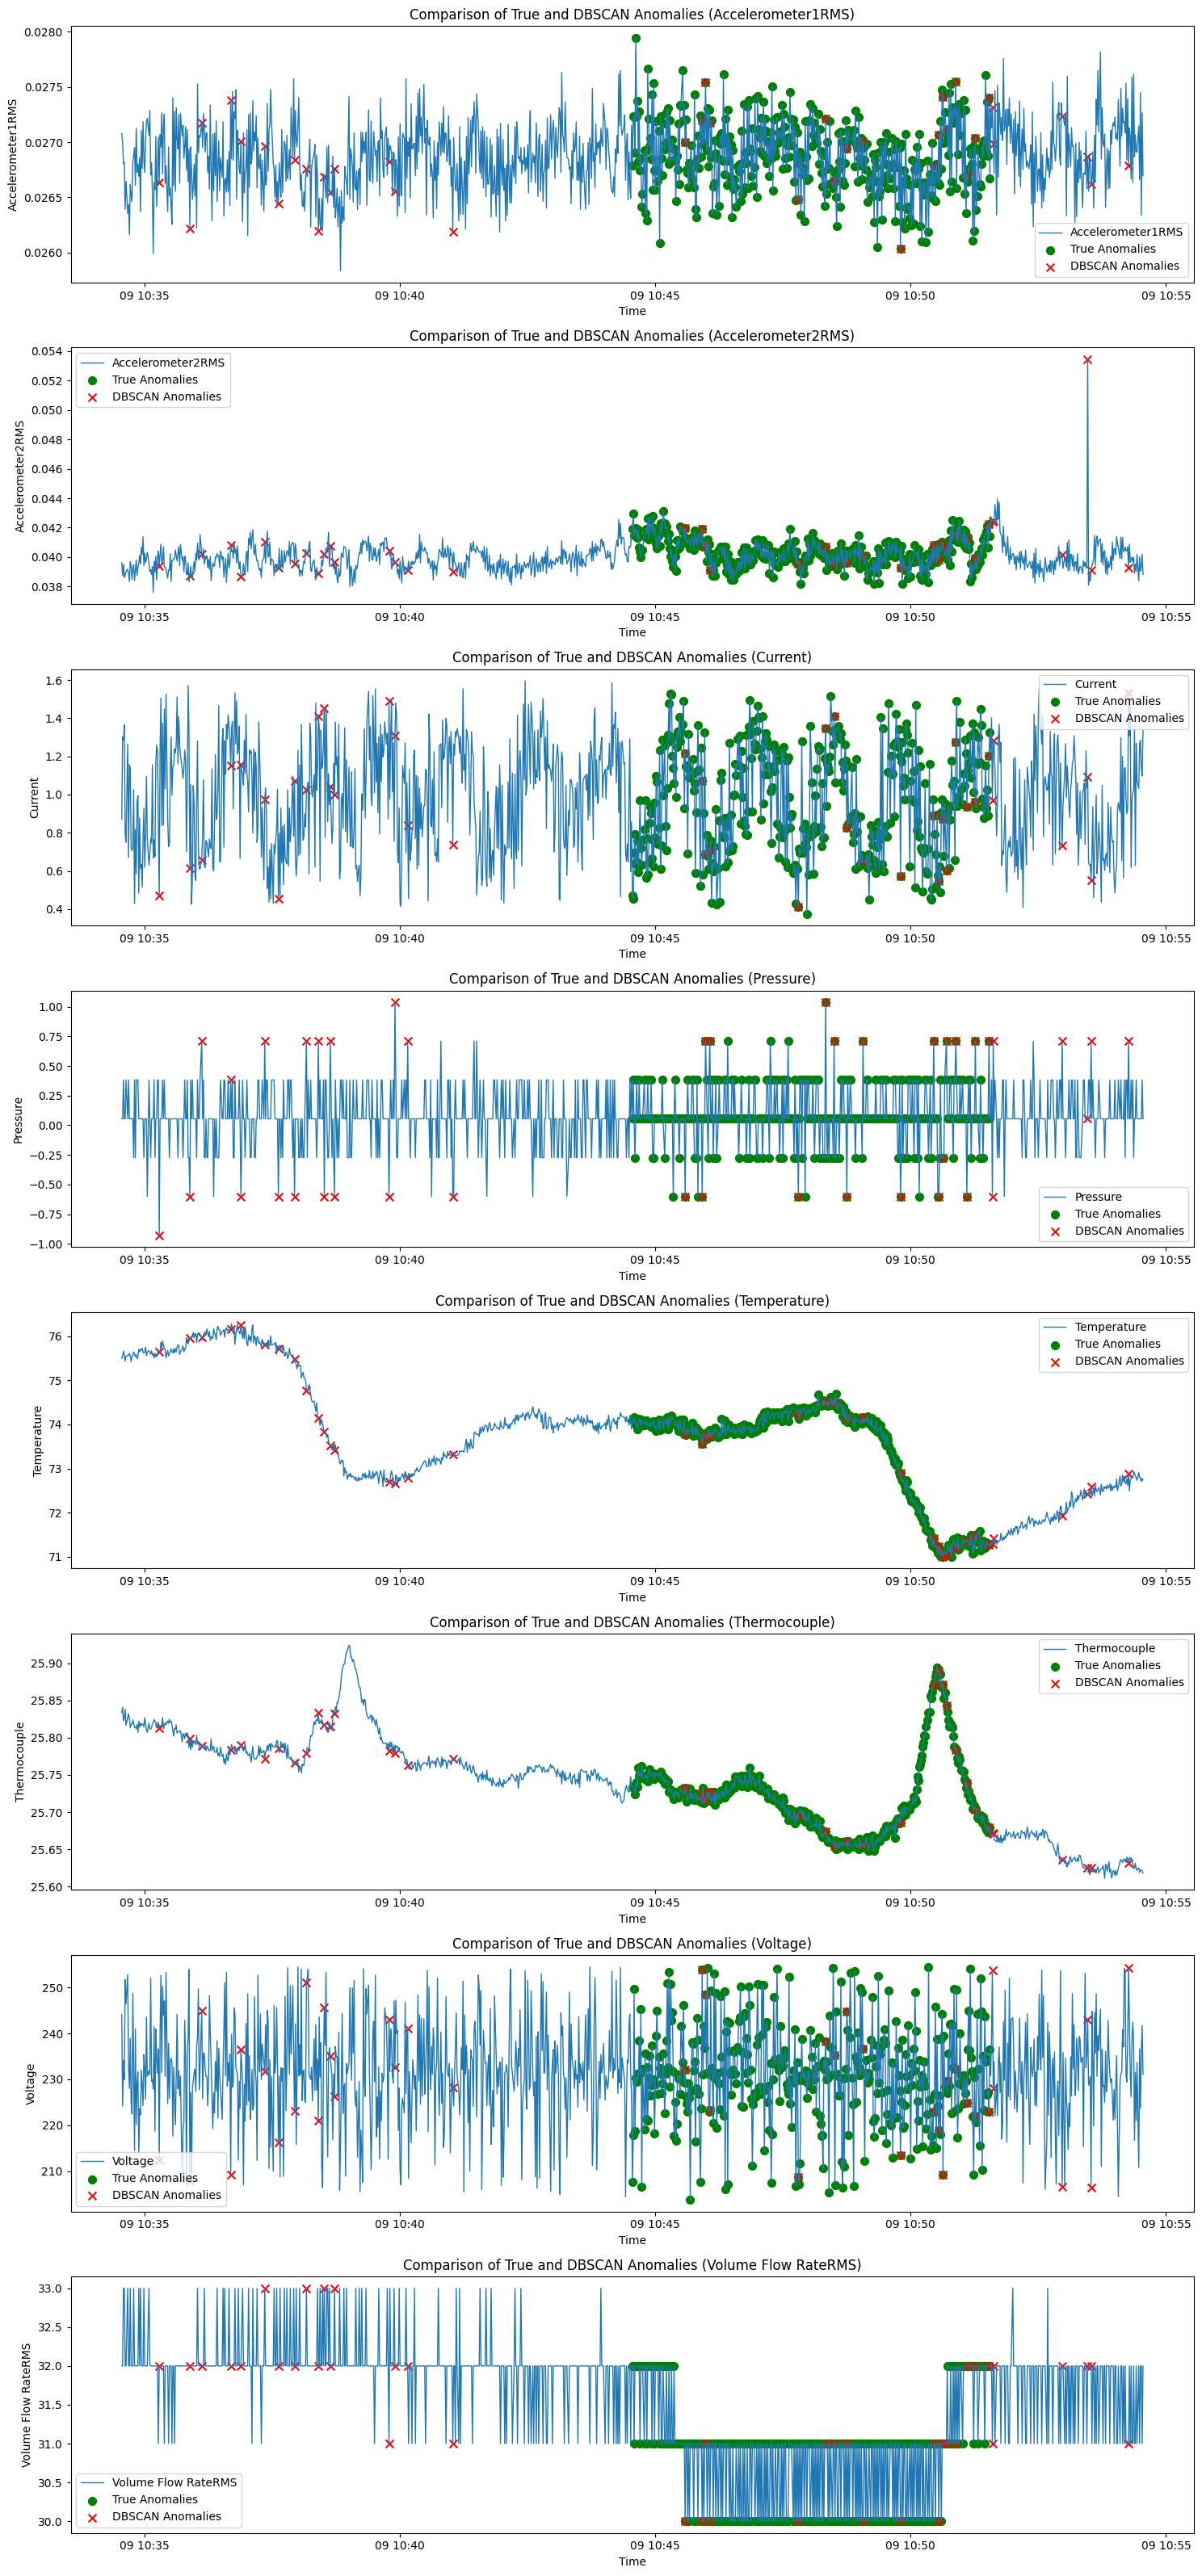

In [ ]:
# Визуализация аномалий для всех столбцов

features_to_plot = train_numerical_columns

plt.figure(figsize=(15, len(features_to_plot) * 4))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(valve1_df['datetime'], valve1_df[feature], label=feature, linewidth=1)

    # Реальные аномалии
    plt.scatter(
        valve1_df['datetime'][true_anomalies],
        valve1_df[feature][true_anomalies],
        color='green',
        label='True Anomalies',
        s=50,
        marker='o'
    )

    # Предсказанные аномалии DBSCAN
    plt.scatter(
        valve1_df['datetime'][test_anomalies],
        valve1_df[feature][test_anomalies],
        color='red',
        label='DBSCAN Anomalies',
        s=50,
        marker='x'
    )

    plt.title(f"Comparison of True and DBSCAN Anomalies ({feature})")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


Работа DBSCAN на тестовых данных дала возможность подобрать нам примерные параметры, но дала достаточно низкие непереносимые результаты на тестовых данных.